In [3]:
import sys
sys.path.append('../')

import numpy as np
from qiskit import IBMQ, Aer
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel
from QuantumTomography import RandomUnitary

In [4]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [5]:
backend = provider.get_backend('ibm_lagos')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)
job_manager = IBMQJobManager()


In [6]:
# 0-1-2
#   3
# 4-5-6

parall_qubits_all = [   [(1,3)],
                    [(3,5)],
                    [(0,3)],
                    [(2,3)],
                    [(3,4)],
                    [(3,6)],
                    ] 

In [7]:
# for parall_qubits in parall_qubits_all :
#     qndmt = device_process_measurement_tomography( backend, parall_qubits=[parall_qubits] )
#     circuits_qndmt = qndmt.circuits()
#     job = job_manager.run( transpile( circuits_qndmt, backend ) , backend=backend, shots=2**13 )
#     job_id = job.job_set_id()
#     print( job_id )

In [11]:
job_ids = ['da8e16ea5bd3495188ee2d1c0ea6c643-166250463225726',
            'b86876eb77b24a17b38e7891fd0b0d74-1662504635643602',
            '8318ed4ecbd24beca0ecd01c9b4dbdee-16625046389304116',
            '98a3b971069549ea956a3907cf7905f9-16625046423653195',
            'b16d40ca0b1542d5bbabf4d7a72ee562-16625046457092187',
            '1d74ff22f4d44f94bfff1f20b60d588a-16625046490846372']

In [12]:
chois = []

for j in range(len(job_ids)) :
    qndmt = device_process_measurement_tomography( backend, parall_qubits=[parall_qubits_all[j]] )
    circuits_qndmt = qndmt.circuits()

    job = job_manager.retrieve_job_set( job_ids[j], provider )
    results = job.results().combine_results()

    choi_single, choi_double, gateset  = qndmt.fit( results, paralell=True, gate_set=True ) 

    chois.append( [ choi_single, choi_double ] )


In [28]:
quantities = []
for j in range(len(job_ids)) :
    Qs = Cross_Quantities( chois[j][0][0][0], chois[j][0][0][1],
                            chois[j][0][1][0], chois[j][0][1][1],
                            chois[j][1][0][0][0], chois[j][1][0][0][1]
                        )
    quantities.append( Qs )

In [39]:
dist_1 = np.mean( np.array(quantities)[:2,:], axis=0 )
dist_2 = np.mean( np.array(quantities)[2:,:], axis=0 )
dist_1, dist_2

(array([0.00854564, 0.00333686]), array([0.00681096, 0.00267759]))

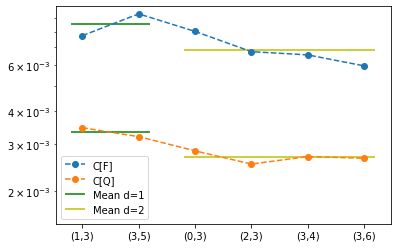

In [59]:
plt.semilogy(quantities, '--o', label=[ 'C[F]', 'C[Q]' ] )
plt.hlines( dist_1, -0.2, 1.2, 'g', label='Mean d=1' )
plt.hlines( dist_2, 1.8, 5.2, 'y', label='Mean d=2' )
plt.xticks( range(6), labels=['(1,3)', '(3,5)', '(0,3)',
                              '(2,3)', '(3,4)', '(3,6)']);
plt.ylim( bottom=1.5e-3 )
plt.legend( )
plt.savefig('fig_correlations_distance.png') 